In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import warnings
import nltk
warnings.filterwarnings('ignore')

In [2]:
#from google.colab import drive  

In [3]:
dataset=pd.read_csv('train[1].csv')
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
dataset.shape

(20800, 5)

In [5]:
dataset.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [6]:
dataset.drop_duplicates()
dataset.head()
dataset.shape

(20800, 5)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [8]:
dataset.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
dataset.dropna(axis=0, inplace=True)

In [10]:
dataset.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [11]:
dataset.shape

(18285, 5)

In [12]:
dataset.label.value_counts()

0    10361
1     7924
Name: label, dtype: int64

Text(0.5, 1.0, 'label countplot')

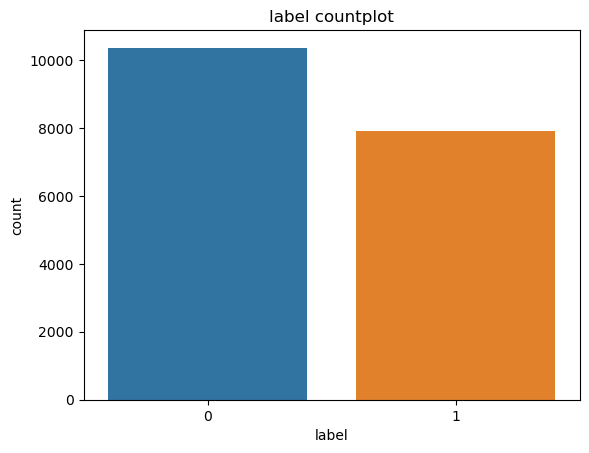

In [13]:
sns.countplot('label',data=dataset)
plt.title('label countplot')


In [14]:
x=dataset.drop('label', axis=1)
x

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [15]:
y=dataset['label']
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64

In [16]:
dataset['title+author']=dataset['title']+ '' + dataset['author']
dataset

,id,title,author,text,label,title+author
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You FiredConsortiumnew...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Rapper T.I.: Trump a ’Poster Child For White S...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Macy’s Is Said to Receive Takeover Approach by...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [17]:
message=dataset.copy()
message.reset_index(inplace=True)
message.head()

,index,id,title,author,text,label,title+author
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You FiredConsortiumnew...
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [18]:
message.columns

Index(['index', 'id', 'title', 'author', 'text', 'label', 'title+author'], dtype='object')

In [19]:
message['text'][5]

'In these trying times, Jackie Mason is the Voice of Reason. [In this week’s exclusive clip for Breitbart News, Jackie discusses the looming threat of North Korea, and explains how President Donald Trump could win the support of the Hollywood left if the U. S. needs to strike first.  “If he decides to bomb them, the whole country will be behind him, because everybody will realize he had no choice and that was the only thing to do,” Jackie says. “Except the Hollywood left. They’ll get nauseous. ” “[Trump] could win the left over, they’ll fall in love with him in a minute. If he bombed them for a better reason,” Jackie explains. “Like if they have no transgender toilets. ” Jackie also says it’s no surprise that Hollywood celebrities didn’t support Trump’s strike on a Syrian airfield this month. “They were infuriated,” he says. “Because it might only save lives. That doesn’t mean anything to them. If it only saved the environment, or climate change! They’d be the happiest people in the wo

In [20]:
from nltk.stem.porter import PorterStemmer
import re
import string
# import review

In [21]:
ps=PorterStemmer()
corpus=[]

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\romua\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

for i in range(0,len(message)):
  #print(i)
  review = re.sub('[^a-zA-Z]',' ',message['title'][i])
  review = review.lower()
  review = review.split()

  review = [ ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
x_cv=cv.fit_transform(corpus).toarray()

In [25]:
data_cv=pd.concat([dataset,pd.DataFrame(x_cv)],axis=1)
data_cv

,id,title,author,text,label,title+author,0,1,2,3,...,13903,13904,13905,13906,13907,13908,13909,13910,13911,13912
0,0.0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1.0,House Dem Aide: We Didn’t Even See Comey’s Let...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0.0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1.0,Why the Truth Might Get You FiredConsortiumnew...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1.0,15 Civilians Killed In Single US Airstrike Hav...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1.0,Iranian woman jailed for fictional unpublished...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18263,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18272,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18274,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18275,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
data_cv.isna().sum()

id        2211
title     2211
author    2211
text      2211
label     2211
          ... 
13908     2211
13909     2211
13910     2211
13911     2211
13912     2211
Length: 13919, dtype: int64

In [27]:
data_cv.dropna(axis=0, inplace=True)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_cv.drop(['label'],axis=1),data_cv['label'],test_size=0.3,random_state=0)

In [29]:
! pip install imblearn

In [30]:

cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [31]:
x_train= x_train.drop(['id','title','author','text','title+author'],axis=1)
x_train

,0,1,2,3,4,5,6,7,8,9,...,13903,13904,13905,13906,13907,13908,13909,13910,13911,13912
8757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:

y_train

8757     1.0
10849    0.0
6509     0.0
3648     0.0
5555     0.0
        ... 
14930    1.0
3749     0.0
11206    1.0
12267    0.0
3126     0.0
Name: label, Length: 11251, dtype: float64

In [33]:
from sklearn.naive_bayes import MultinomialNB
cv_classifier=MultinomialNB(alpha=0.1)
cv_classifier.fit(x_train,y_train)

MultinomialNB(alpha=0.1)

In [34]:
x_test.head()

,id,title,author,text,title+author,0,1,2,3,4,...,13903,13904,13905,13906,13907,13908,13909,13910,13911,13912
10994,10994.0,Patients Lose Sight After Stem Cells Are Injec...,Denise Grady,"Three women suffered severe, permanent eye dam...",Patients Lose Sight After Stem Cells Are Injec...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4382,4382.0,Most Idiotic Comment Ever? “Sell Gold Because ...,admin,"Financial Markets , Gold , Market Manipulation...",Most Idiotic Comment Ever? “Sell Gold Because ...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14621,14621.0,Eliud Kipchoge of Kenya Wins Marathon Galen Ru...,Jeré Longman,RIO DE JANEIRO — The favorite Eliud Kipchog...,Eliud Kipchoge of Kenya Wins Marathon Galen Ru...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5245,5245.0,"‘Silicon Valley’ Season 3, Episode 7: Stop, Be...",Scott Tobias,Until the last mouse click of “To Build a Bett...,"‘Silicon Valley’ Season 3, Episode 7: Stop, Be...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10519,10519.0,Hillary’s Warped Notion,No Author,Chronicles: A Magazine of American Culture Oct...,Hillary’s Warped NotionNo Author,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
x_test=x_test.drop(['id','title','author','text','title+author'],axis=1)
x_test

,0,1,2,3,4,5,6,7,8,9,...,13903,13904,13905,13906,13907,13908,13909,13910,13911,13912
10994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
y_test.isna().sum()

0

In [37]:
x_test.shape

(4823, 13913)

In [38]:
y_test.shape

(4823,)

In [39]:
pred_cv=cv_classifier.predict(x_test)
pred_cv

array([1., 1., 0., ..., 0., 0., 0.])

In [40]:
from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix

In [41]:
print('The accuracy of the fake_news',(accuracy_score(pred_cv,y_test)))

The accuracy of the fake_news 0.510678001244039


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
tfidf_v = TfidfVectorizer()

In [44]:
x_idf=tfidf_v.fit_transform(corpus).toarray()

In [45]:
data_idf = pd.concat([dataset,pd.DataFrame(x_idf)],axis = 1)
data_idf.head()

,id,title,author,text,label,title+author,0,1,2,3,...,13903,13904,13905,13906,13907,13908,13909,13910,13911,13912
0,0.0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1.0,House Dem Aide: We Didn’t Even See Comey’s Let...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0.0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1.0,Why the Truth Might Get You FiredConsortiumnew...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1.0,15 Civilians Killed In Single US Airstrike Hav...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1.0,Iranian woman jailed for fictional unpublished...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
tfidf_v.get_feature_names()

['aa',
 'aaa',
 'aap',
 'aaron',
 'ab',
 'abandon',
 'abandonado',
 'abba',
 'abbi',
 'abbott',
 'abc',
 'abd',
 'abdel',
 'abdeslam',
 'abdic',
 'abduct',
 'abdul',
 'abe',
 'abedi',
 'abedin',
 'abellera',
 'aber',
 'abgelegenen',
 'abgesprochen',
 'abhorr',
 'abil',
 'abl',
 'aboard',
 'abolish',
 'abolit',
 'aborigin',
 'abort',
 'abound',
 'abram',
 'abramovi',
 'abramson',
 'abran',
 'abridg',
 'abroad',
 'abrog',
 'abrupt',
 'abruptli',
 'absenc',
 'absent',
 'absente',
 'absichtlich',
 'absolut',
 'absorb',
 'abstain',
 'absurd',
 'absurdli',
 'abu',
 'abus',
 'abyss',
 'aca',
 'acaba',
 'academ',
 'academi',
 'academia',
 'acc',
 'acceler',
 'accent',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accommod',
 'accomplic',
 'accomplish',
 'acconci',
 'accord',
 'account',
 'acct',
 'accur',
 'accus',
 'acedemi',
 'aceh',
 'ach',
 'acheron',
 'achiev',
 'acid',
 'acknowledg',
 'aclara',
 'aclu',
 'acn',
 'acoplan',
 'acosta',
 'acoust',
 'acquir',
 'acquisit',
 'acqu

In [47]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [48]:
data_idf.drop(['id', 'title', 'author', 'text', 'title+author'],axis=1,inplace=True)

In [49]:
data_idf.dropna(inplace=True)

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_idf.drop(['label'],axis=1),data_idf['label'],test_size=0.3,random_state=0)

In [51]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=1)
x_resampled, y_resampled=smote.fit_resample(x_train,y_train)

In [52]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,13903,13904,13905,13906,13907,13908,13909,13910,13911,13912
8757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
from sklearn.naive_bayes import MultinomialNB
idf_classifier=MultinomialNB(alpha=0.1)
idf_classifier.fit(x_train,y_train)

MultinomialNB(alpha=0.1)

In [54]:
y_resampled.value_counts()

1.0    6408
0.0    6408
Name: label, dtype: int64

In [55]:
pred_idf=idf_classifier.predict(x_test)
pred_idf

array([1., 1., 0., ..., 0., 0., 0.])

In [57]:
from sklearn.naive_bayes import MultinomialNB
idf_classifier=MultinomialNB(alpha=0.1)
idf_classifier.fit(x_resampled,y_resampled)

MultinomialNB(alpha=0.1)

In [59]:
predictions_res=idf_classifier.predict(x_resampled)
print(predictions_res)

[1. 0. 1. ... 1. 1. 1.]


In [64]:
print('the accuracy_score of the fake news model is',(accuracy_score(predictions_res,y_resampled)))

the accuracy_score of the fake news model is 0.8392634207240949


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_resampled,predictions_res))

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      6408
         1.0       0.83      0.85      0.84      6408

    accuracy                           0.84     12816
   macro avg       0.84      0.84      0.84     12816
weighted avg       0.84      0.84      0.84     12816

